In [0]:
!ls

sample_data


In [0]:
#model-ep002-loss3.245-val_loss3.612.h5

In [0]:
# 1kGB2_hUBDqrFEvlMjpItJzkaZWKrRVgR # upload code

In [0]:
#Why did you increment vocab_size by 1 ??

#REPLY

#Jason Brownlee February 26, 2019 at 6:16 am # 
#To start words at index 1 and make room for 0 == unknown word.

In [1]:
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#https://drive.google.com/open?id=1zglOX-AkDkXV3SAiUcQEm0gssYF3FrVZ

download = drive.CreateFile({'id': '1zglOX-AkDkXV3SAiUcQEm0gssYF3FrVZ'})
download.GetContentFile('Flickr8k.zip')



    100% |████████████████████████████████| 993kB 25.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
#https://drive.google.com/open?id=10mMJv6xoKqIMPv4Q1ps8tgbha9_IDWnb
download = drive.CreateFile({'id': '10mMJv6xoKqIMPv4Q1ps8tgbha9_IDWnb'})
download.GetContentFile('model_4_3.h5')


In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import io
import zipfile
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:

uploadId = ''
uploaded = drive.CreateFile({'parents':[{'id': uploadId}] , 'title' : 'features.pkl'})
uploaded.SetContentFile('features.pkl')
uploaded.Upload()

In [0]:
uploadId = ''
uploaded = drive.CreateFile({'parents':[{'id': uploadId}] , 'title' : 'descriptions.txt'})
uploaded.SetContentFile('descriptions.txt')
uploaded.Upload()

In [3]:
!nvidia-smi

Sat Apr 27 05:41:21 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.56       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    16W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [6]:
!ls

adc.json  Flickr8k  Flickr8k.zip  sample_data


In [4]:
!python --version

Python 3.6.7


In [0]:
!unzip Flickr8k.zip

In [7]:
import numpy as np
import pandas as pd
import cv2
import time
import os
import matplotlib.pyplot as plt
import pickle
import string

from keras.applications.inception_resnet_v2 import InceptionResNetV2,preprocess_input

#from keras.applications.vgg16 import VGG16,preprocess_input
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical,plot_model
from keras.models import Model
from keras.layers import Input,Dense,LSTM,Embedding,Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu
#import shutil #dont use shutil it deletes files
from collections import Counter


Using TensorFlow backend.


In [0]:
#https://drive.google.com/open?id=17DW1TayHb1RWrsfGGRP5U6sM62i67mE_
download = drive.CreateFile({'id': '17DW1TayHb1RWrsfGGRP5U6sM62i67mE_'})
download.GetContentFile('counters.pkl')

#https://drive.google.com/open?id=19h2TfPUCCZgHsnFaZz4iSH66-9IUp79M
download = drive.CreateFile({'id': '19h2TfPUCCZgHsnFaZz4iSH66-9IUp79M'})
download.GetContentFile('descriptions.txt')

#https://drive.google.com/open?id=1qQJikIx1CuCoemzfDMUYOCmkiMz9gJQV
download = drive.CreateFile({'id': '1qQJikIx1CuCoemzfDMUYOCmkiMz9gJQV'})
download.GetContentFile('embeddings_index.pkl')

#https://drive.google.com/open?id=1a-IDaIMX52znZCeuBxwC58D4j3J85cKB
download = drive.CreateFile({'id': '1a-IDaIMX52znZCeuBxwC58D4j3J85cKB'})
download.GetContentFile('features.pkl')

#https://drive.google.com/open?id=1tNm73xzJHaGLqJjiXfKthZzjmH7q32U6
download = drive.CreateFile({'id': '1tNm73xzJHaGLqJjiXfKthZzjmH7q32U6'})
download.GetContentFile('vocabulary.pkl')


counters=pickle.load(open('counters.pkl','rb'))
#descriptions=pickle.load(open('descriptions.txt','rb'))
embeddings_index=pickle.load(open('embeddings_index.pkl','rb'))
features=pickle.load(open('features.pkl','rb'))
vocabulary=pickle.load(open('vocabulary.pkl','rb'))



In [0]:
#https://drive.google.com/open?id=1gL1hvfsYTWr5QTdOVBrRkGMXbIc8cHRC
download = drive.CreateFile({'id': '1gL1hvfsYTWr5QTdOVBrRkGMXbIc8cHRC'})
download.GetContentFile('model-ep003-loss3.360-val_loss3.631.h5')

In [0]:
#https://drive.google.com/open?id=141UihuXXJ8BUWz-Vgj6gPWywa8DKDEdn
download = drive.CreateFile({'id': '141UihuXXJ8BUWz-Vgj6gPWywa8DKDEdn'})
download.GetContentFile('wiki-news-300d-1M.vec.zip')


In [8]:
def extract_features():
  iterlist=os.listdir('Flickr8k/Flicker8k_Dataset/')
  model=InceptionResNetV2()
  
  plot_model(model,to_file='InceptionResNetV2.png',show_shapes=True,show_layer_names=True)
  
  model.layers.pop()
  
  plot_model(model,to_file='InceptionResNetV2_POP.png',show_shapes=True,show_layer_names=True)
  
  model=Model(inputs=model.inputs,outputs=model.layers[-1].output)
  print(model.summary())
  
  features=dict()
  for name in iterlist:
    img=load_img('Flickr8k/Flicker8k_Dataset/'+name,target_size=(299,299))
    img=img_to_array(img)
    img=img.reshape((1,img.shape[0],img.shape[1],img.shape[2]))
    img=preprocess_input(img)
    feature=model.predict(img)
    img_id=name.split('.')[0]
    features[img_id]=feature
    print(name)
    
  return features

start=time.time()
features=extract_features()
end=time.time()
print(end-start)
print(len(features))
pickle.dump(features,open('features.pkl','wb'))

Instructions for updating:
Colocations handled automatically by placer.
225214464/225209952 [==============================] - 6s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batc

In [0]:
#361.1368978023529  # Tesla T4
#8091

In [0]:
# 905.555778503418
# 8091

In [10]:
iterlist=os.listdir('Flickr8k/Flicker8k_Dataset/')
t=features[iterlist[0].split('.')[0]]
t.shape
t

array([[0.21022488, 0.30633387, 0.65083563, ..., 0.1528129 , 0.07382458,
        0.04498662]], dtype=float32)

In [0]:
def load_doc(fname):
  fp=open(fname,'r')
  txt=fp.read()
  fp.close()
  return txt

fname='Flickr8k/Flickr8k_text/Flickr8k.token.txt'
doc=load_doc(fname)

In [12]:
t=doc.split('\n')
print(t[1].split())
' '.join(t[1].split())

['1000268201_693b08cb0e.jpg#1', 'A', 'girl', 'going', 'into', 'a', 'wooden', 'building', '.']


'1000268201_693b08cb0e.jpg#1 A girl going into a wooden building .'

In [13]:
def load_descriptions(doc):
  mapping=dict()
  for line in doc.split('\n'):
    tokens=line.split()
    if(len(line))<2:
      continue
    
    img_id,img_desc=tokens[0].split('.')[0],' '.join(tokens[1:])
    
    if img_id not in mapping:
      mapping[img_id]=list()
    
    mapping[img_id].append(img_desc)
  return mapping

start=time.time()
descriptions=load_descriptions(doc)
end=time.time()
print(len(descriptions))
print(end - start)

8092
0.10059618949890137


In [14]:
def clean_descriptions(descriptions):
  table=str.maketrans('','',string.punctuation)
  for key,desc_list in descriptions.items():
    for i in range(len(desc_list)):
      desc=desc_list[i].split()
      desc=[w.lower() for w in desc]
      desc=[w.translate(table) for w in desc]
      desc=[w for w in desc if len(w)>1]
      desc=[w for w in desc if w.isalpha()]
      desc_list[i]=' '.join(desc)
      
start=time.time()      
clean_descriptions(descriptions)
end=time.time()
print(end-start)

0.5536091327667236


In [15]:
def to_vocabulary(descriptions):
  vocab=set()
  ctrlst=[]
  
  for key in descriptions.keys():
    
    [[ctrlst.append(word) for word in sentence.split()] for sentence in descriptions[key]]
    
    [vocab.update(sentence.split()) for sentence in descriptions[key]]
  
  ctr=Counter(ctrlst)
  
  return vocab,ctr   

vocabulary,counters=to_vocabulary(descriptions)
print(len(vocabulary))
print(len(counters))

pickle.dump(vocabulary,open('vocabulary.pkl','wb'))
pickle.dump(counters,open('counters.pkl','wb'))

def save_descriptions(descriptions,fname):
  lines=list()
  for key,desc_list in descriptions.items():
    for sentence in desc_list:
      lines.append(key+' '+sentence)
      
  data= '\n'.join(lines)
  fp=open(fname,'w')
  fp.write(data)
  fp.close()
    
start=time.time()
save_descriptions(descriptions,'descriptions.txt')
end=time.time()
print(end-start)  

8763
8763
0.018997907638549805


In [16]:
#counters=pickle.load(open('counters.pkl','rb'))

counters['child']

1545

In [20]:
!ls

adc.json	  features.pkl	InceptionResNetV2.png	   vocabulary.pkl
counters.pkl	  Flickr8k	InceptionResNetV2_POP.png
descriptions.txt  Flickr8k.zip	sample_data


In [18]:
def load_set(fname):
  doc=load_doc(fname)
  dataset=list()
  for line in doc.split('\n'):
    if len(line)<1:
      continue
    identifier=line.split('.')[0]
    dataset.append(identifier)

  return set(dataset)

def load_clean_descriptions(fname,dataset):
  doc=load_doc(fname)
  descriptions = dict()
  for line in doc.split('\n'):
    tokens=line.split()
    img_id,img_desc=tokens[0],tokens[1:]
    if img_id in dataset:
      if img_id not in descriptions:
        descriptions[img_id]=list()
      
      desc='startseq ' + ' '.join(img_desc) + ' endseq'
      #print(img_id,img_desc)
      descriptions[img_id].append(desc)
      #print(img_id,descriptions[img_id])
  
  return descriptions

def load_photo_features(fname,dataset):
  all_features=pickle.load(open(fname,'rb'))
  features={k:all_features[k] for k in dataset}
  return features

fname='Flickr8k/Flickr8k_text/Flickr_8k.trainImages.txt'
train=load_set(fname)
print(len(train))
train_descriptions=load_clean_descriptions('descriptions.txt',train)
print(len(train_descriptions))
train_features=load_photo_features('features.pkl',train)
print(len(train_features))

6000
6000
6000


In [19]:
fname2='Flickr8k/Flickr8k_text/Flickr_8k.testImages.txt'
test=load_set(fname2)
print(len(test))
test_descriptions=load_clean_descriptions('descriptions.txt',test)
print(len(test_descriptions))
test_features=load_photo_features('features.pkl',test)
print(len(test_features))

fname3='Flickr8k/Flickr8k_text/Flickr_8k.devImages.txt'
validtn=load_set(fname3)
print(len(validtn))
validtn_descriptions=load_clean_descriptions('descriptions.txt',validtn)
print(len(validtn_descriptions))
validtn_features=load_photo_features('features.pkl',validtn)
print(len(validtn_features))

1000
1000
1000
1000
1000
1000


In [21]:
def to_lines(descriptions):
  all_desc=list()
  for key in descriptions.keys():
    [all_desc.append(d) for d in descriptions[key]]
  return all_desc

def create_tokenizer(descriptions):
  lines=to_lines(descriptions)
  tokenizer=Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

tokenizer=create_tokenizer(train_descriptions)
vocab_size=len(tokenizer.word_index)+1
print(vocab_size)

7579


In [22]:
len(counters)

8763

In [0]:
!wget 'https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip'

--2019-03-11 15:13:40--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.6.166, 104.20.22.166, 2606:4700:10::6814:16a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.6.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  37.7MB/s    in 18s     

2019-03-11 15:13:58 (36.9 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]



In [0]:
!unzip wiki-news-300d-1M.vec.zip

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [0]:
tokenizer.word_index

In [0]:
!ls

adc.json	  Flickr8k		     sample_data
counters.pkl	  Flickr8k.zip		     vocabulary.pkl
descriptions.txt  InceptionResNetV2.png      wiki-news-300d-1M.vec
features.pkl	  InceptionResNetV2_POP.png  wiki-news-300d-1M.vec.zip


In [0]:
start=time.time()
embeddings_index = {}
for i, line in enumerate(open('wiki-news-300d-1M.vec')): 
    values = line.split()
    embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')
end=time.time()
print(end-start)
#embeddings_index

77.10805439949036


In [0]:
#embeddings_index
pickle.dump(embeddings_index,open('embeddings_index.pkl','wb'))

In [0]:
embeddings_index=pickle.load(open('embeddings_index.pkl','rb'))

In [0]:
embeddings_index

In [23]:
vocab_size

7579

In [24]:
len(tokenizer.word_index)

7578

In [0]:
start=time.time()
# create token-embedding mapping
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 300))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
end=time.time()
print(end-start)
print(embedding_matrix.shape)

0.03150153160095215
(7579, 300)


In [0]:
embedding_matrix

In [0]:
def create_sequences(tokenizer, max_length, descriptions, photos):
  x1,x2,y=list(),list(),list()
  
  for key, desc_list in descriptions.items():
    for desc in desc_list:
      seq=tokenizer.texts_to_sequences([desc])[0]
      
      for i in range(1,len(seq)):
        in_seq,out_seq=seq[:i],seq[i]
        in_seq=pad_sequences([in_seq],maxlen=max_length)[0]
        out_seq=to_categorical([out_seq], num_classes=vocab_size)[0]
        
        x1.append(photos[key][0])
        x2.append(in_seq)
        y.append(out_seq)
        
  return np.array(x1),np.array(x2),np.array(y)


def max_length(descriptions):
  lines=to_lines(descriptions)
  return max(len(d.split()) for d in lines)

def define_model(vocab_size,max_length):
  #inputs1=Input(shape=(4096,)) #vgg16

  inputs1=Input(shape=(1536,))  #inception resnet v2
    
  # feature extractor
  fe1=Dropout(0.5)(inputs1)
  fe2=Dense(256,activation='relu')(fe1)
  
  # sequence processor
  inputs2=Input(shape=(max_length,))
  se1=Embedding(vocab_size,256,mask_zero=True)(inputs2)
  #se1=Embedding(vocab_size,300,mask_zero=True,weights=[embedding_matrix], trainable=True)(inputs2)
  se2=Dropout(0.5)(se1)
  se3=LSTM(256)(se2)
  
  # decoder
  decoder1=add([fe2,se3])
  decoder2=Dense(256,activation='relu')(decoder1)
  outputs=Dense(vocab_size,activation='softmax')(decoder2)
  
  model=Model(inputs=[inputs1,inputs2],outputs=[outputs])
  model.compile(loss='categorical_crossentropy',optimizer='adam')
  
  print(model.summary())
  plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)
  
  #plot_model(model,to_file='model_expandnested.png',show_shapes=True,show_layer_names=True,expand_nested=True)
  
  return model

#mask_zero: Whether or not the input value 0 is a special "padding"
#value that should be masked out. This is useful when using 
#recurrent layers which may take variable length input. If this 
#is True then all subsequent layers in the model need to support 
#masking or an exception will be raised. If mask_zero is set to 
#True, as a consequence, index 0 cannot be used in the vocabulary
#(input_dim should equal size of vocabulary + 1).

In [26]:
max_len=max_length(train_descriptions)
print(max_len)

#x1train,x2train,ytrain=create_sequences(tokenizer,max_len,train_descriptions,train_features)

#fname='Flickr8k/Flickr8k_text/Flickr_8k.devImages.txt'
#test=load_set(fname)
#print(len(test))
#test_descriptions=load_clean_descriptions('descriptions.txt',test)
#test_features=load_photo_features('features.pkl',test)
#print(len(test_features))

#x1test,x2test,ytest=create_sequences(tokenizer,max_len,test_descriptions,test_features)

model=define_model(vocab_size,max_len)

filepath='model-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'

checkpoint=ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True,mode='min')

#tensorboard=TensorBoard(log_dir="logs/{}".format(time()))

#model.fit([x1train,x2train],ytrain,epochs=10,verbose=2,callbacks=[checkpoint,tensorboard],validation_data=([x1test,x2test],ytest))


34
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 34)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1536)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 34, 256)      1940224     input_3[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 1536)         0           input_2[0][0]            

In [0]:
#dataset=train/test/valid
def data_generator(dataset,descriptions,photos,tokenizer,max_len,batch_size=64):
    num_samples=len(descriptions)
    
    iterlist=list(dataset)
        
    while True:
        for i in range(0,num_samples,batch_size):
            
            yield_in_img,yield_in_seq,yield_out_word=[],[],[]
            
            keyslist=iterlist[i:i+batch_size]
            newdict={}
            for key in keyslist:
                newdict[key]=descriptions[key]
                
            for key, desc_list in newdict.items():
                photo=photos[key][0]
                in_img,in_seq,out_word=create_sequences(tokenizer,max_len,desc_list,photo)
                
                yield_in_img.append(in_img)
                yield_in_seq.append(in_seq)
                yield_out_word.append(out_word)
      
            
            yi=np.array(yield_in_img)
            ys=np.array(yield_in_seq)
            yo=np.array(yield_out_word)
            
            yield [[yi,ys],yo]
            
            #yield [[yield_in_img,yield_in_seq],yield_out_word]

In [28]:
iterlist=list(train)
keyslist=iterlist[1:1+5]
valuelist=[]
newdict={}
for key in keyslist:
    newdict[key]=train_descriptions[key]
newdict.items()   

dict_items([('2110692070_8aaaa1ae39', ['startseq dog is running through green yard endseq', 'startseq dog running though green yard endseq', 'startseq white and black spotted dog is running through grassy area endseq', 'startseq white dog with brown spots is jumping through the air endseq', 'startseq black and white dog running across grass endseq']), ('2881441125_b580e3dd4b', ['startseq one child running net through bucket of water and another child filling bucket endseq', 'startseq two children cleaning water in their village endseq', 'startseq two children ladle water and blue watering can sits behind them endseq', 'startseq two children outside near container of water and watering pail endseq', 'startseq two small children are gathering water from large container endseq']), ('709373049_15b8b6457a', ['startseq little girl plays with the tire swing at the playground endseq', 'startseq young girl at park is jumping off tire swing while it is swinging into the air endseq', 'startseq yo

In [0]:
def create_sequences(tokenizer, max_length, desc_list, photo):
  x1,x2,y=list(),list(),list()
  
  for desc in  desc_list:
    
    seq=tokenizer.texts_to_sequences([desc])[0]
      
    for i in range(1,len(seq)):
        in_seq,out_seq=seq[:i],seq[i]
        in_seq=pad_sequences([in_seq],maxlen=max_length)[0]
        out_seq=to_categorical([out_seq], num_classes=vocab_size)[0]
        
        x1.append(photo)
        x2.append(in_seq)
        y.append(out_seq)
        
        if(i%100==0):
          print(i)
        
  return np.array(x1),np.array(x2),np.array(y)

In [0]:
def create_sequences(tokenizer, max_length, descriptions, photos):
  x1,x2,y=list(),list(),list()
  
  for key, desc_list in descriptions.items():
    for desc in desc_list:
      seq=tokenizer.texts_to_sequences([desc])[0]
      
      for i in range(1,len(seq)):
        in_seq,out_seq=seq[:i],seq[i]
        in_seq=pad_sequences([in_seq],maxlen=max_length)[0]
        out_seq=to_categorical([out_seq], num_classes=vocab_size)[0]
        
        x1.append(photos[key][0])
        x2.append(in_seq)
        y.append(out_seq)
        
  return np.array(x1),np.array(x2),np.array(y)



In [0]:
#original

def data_generator(descriptions,photos,tokenizer,max_len):
  while True:
    for key, desc_list in descriptions.items():
      photo=photos[key][0]
      in_img,in_seq,out_word=create_sequences(tokenizer,max_len,desc_list,photo)
      
      yield [[in_img,in_seq],out_word]
        
def create_sequences(tokenizer, max_length, desc_list, photo):
  x1,x2,y=list(),list(),list()
  
  for desc in  desc_list:
    
    seq=tokenizer.texts_to_sequences([desc])[0]
      
    for i in range(1,len(seq)):
        in_seq,out_seq=seq[:i],seq[i]
        in_seq=pad_sequences([in_seq],maxlen=max_length)[0]
        out_seq=to_categorical([out_seq], num_classes=vocab_size)[0]
        
        x1.append(photo)
        x2.append(in_seq)
        y.append(out_seq)
        
        if(i%100==0):
          print(i)
        
  return np.array(x1),np.array(x2),np.array(y)

In [32]:
max_len=max_length(train_descriptions)
print(max_len)

start=time.time()

generator=data_generator(train_descriptions,train_features,tokenizer,max_len)
inputs,outputs=next(generator)

end=time.time()
print(end-start)
#print(len(inputs[0]),len(inputs[1]),len(outputs))
#print(inputs[0][0].shape,inputs[1][0].shape,outputs[0].shape)
print(inputs[0].shape)
print(inputs[1].shape)
print(outputs.shape)
#34
#0.003874540328979492
#(47, 1536)
#(47, 34)
#(47, 7579)

34
0.0043942928314208984
(47, 1536)
(47, 34)
(47, 7579)


In [33]:
inputs[0][0][1].shape

()

In [34]:
len(train_descriptions),len(train_features),len(train)

(6000, 6000, 6000)

In [0]:
#
generator_train=data_generator(train_descriptions,train_features,tokenizer,max_len)
generator_test=data_generator(test_descriptions,test_features,tokenizer,max_len)
generator_validtn=data_generator(validtn_descriptions,validtn_features,tokenizer,max_len)


In [37]:
#tensorboard=TensorBoard(log_dir="logs/{}".format(time()))

#model.fit([x1train,x2train],ytrain,epochs=10,verbose=2,callbacks=[checkpoint,tensorboard],validation_data=([x1test,x2test],ytest))

generator_train=data_generator(train_descriptions,train_features,tokenizer,max_len)

generator_test=data_generator(test_descriptions,test_features,tokenizer,max_len)
  
generator_validtn=data_generator(validtn_descriptions,validtn_features,tokenizer,max_len)
  

#model.fit_generator(generator_train,steps_per_epoch=64,epochs=20,verbose=2,validation_data=next(generator_validtn),validation_steps=64,callbacks=[checkpoint])#tf.keras.callbacks.TensorBoard()

model.fit_generator(generator_train,steps_per_epoch=len(train),epochs=20,verbose=1,callbacks=[checkpoint,TensorBoard()],validation_data=generator_test,validation_steps=len(validtn))


Instructions for updating:
Use tf.cast instead.
Epoch 1/20
6000/6000 [==============================] - 535s 89ms/step - loss: 4.4907 - val_loss: 3.9083

Epoch 00001: val_loss improved from inf to 3.90825, saving model to model-ep001-loss4.511-val_loss3.908.h5
Epoch 2/20
6000/6000 [==============================] - 534s 89ms/step - loss: 3.6803 - val_loss: 3.7235

Epoch 00002: val_loss improved from 3.90825 to 3.72346, saving model to model-ep002-loss3.701-val_loss3.723.h5
Epoch 3/20
6000/6000 [==============================] - 533s 89ms/step - loss: 3.4121 - val_loss: 3.6833

Epoch 00003: val_loss improved from 3.72346 to 3.68325, saving model to model-ep003-loss3.433-val_loss3.683.h5
Epoch 4/20
6000/6000 [==============================] - 537s 89ms/step - loss: 3.2504 - val_loss: 3.6963

Epoch 00004: val_loss did not improve from 3.68325
Epoch 5/20
6000/6000 [==============================] - 535s 89ms/step - loss: 3.1381 - val_loss: 3.7217

Epoch 00005: val_loss did not improve from

In [38]:
2+1

3

In [39]:
1+1

2

In [43]:
1+6

7

In [41]:
2+5

7

In [42]:
2+3

5

In [44]:
!ls

adc.json		   logs
counters.pkl		   model-ep001-loss4.511-val_loss3.908.h5
descriptions.txt	   model-ep002-loss3.701-val_loss3.723.h5
features.pkl		   model-ep003-loss3.433-val_loss3.683.h5
Flickr8k		   model.png
Flickr8k.zip		   sample_data
InceptionResNetV2.png	   vocabulary.pkl
InceptionResNetV2_POP.png


In [0]:
##########################

In [0]:
#tensorboard=TensorBoard(log_dir="logs/{}".format(time()))

#model.fit([x1train,x2train],ytrain,epochs=10,verbose=2,callbacks=[checkpoint,tensorboard],validation_data=([x1test,x2test],ytest))

generator_train=data_generator(train_descriptions,train_features,tokenizer,max_len)

generator_test=data_generator(test_descriptions,test_features,tokenizer,max_len)
  
generator_validtn=data_generator(validtn_descriptions,validtn_features,tokenizer,max_len)
  

#model.fit_generator(generator_train,steps_per_epoch=64,epochs=20,verbose=2,validation_data=next(generator_validtn),validation_steps=64,callbacks=[checkpoint])#tf.keras.callbacks.TensorBoard()

model.fit_generator(generator_train,steps_per_epoch=len(train),epochs=20,verbose=1,callbacks=[checkpoint,TensorBoard()],validation_data=generator_test,validation_steps=len(validtn))


Instructions for updating:
Use tf.cast instead.
Epoch 1/20
6000/6000 [==============================] - 786s 131ms/step - loss: 4.4918 - val_loss: 3.8966

Epoch 00001: val_loss improved from inf to 3.89662, saving model to model-ep001-loss4.512-val_loss3.897.h5
Epoch 2/20
6000/6000 [==============================] - 785s 131ms/step - loss: 3.6672 - val_loss: 3.7173

Epoch 00002: val_loss improved from 3.89662 to 3.71729, saving model to model-ep002-loss3.688-val_loss3.717.h5
Epoch 3/20
6000/6000 [==============================] - 781s 130ms/step - loss: 3.3980 - val_loss: 3.6693

Epoch 00003: val_loss improved from 3.71729 to 3.66925, saving model to model-ep003-loss3.420-val_loss3.669.h5
Epoch 4/20
6000/6000 [==============================] - 787s 131ms/step - loss: 3.2372 - val_loss: 3.6948

Epoch 00004: val_loss did not improve from 3.66925
Epoch 5/20
6000/6000 [==============================] - 783s 131ms/step - loss: 3.1229 - val_loss: 3.7052

Epoch 00005: val_loss did not improve

In [0]:
!ls

sample_data


In [45]:
# serialize model to JSON
model_json = model.to_json()
with open("model_epoch20.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_epoch20.h5")
print("Saved model to disk")

Saved model to disk


In [46]:
!ls

adc.json	  InceptionResNetV2.png			  model_epoch20.h5
counters.pkl	  InceptionResNetV2_POP.png		  model_epoch20.json
descriptions.txt  logs					  model.png
features.pkl	  model-ep001-loss4.511-val_loss3.908.h5  sample_data
Flickr8k	  model-ep002-loss3.701-val_loss3.723.h5  vocabulary.pkl
Flickr8k.zip	  model-ep003-loss3.433-val_loss3.683.h5


In [47]:
!ls -r logs

events.out.tfevents.1556344422.d0df79d93235


In [49]:
!zip -r logs.zip logs

  adding: logs/ (stored 0%)
  adding: logs/events.out.tfevents.1556344422.d0df79d93235 (deflated 82%)


In [0]:
pickle.dump(train,open('train_set.pkl','wb'))
pickle.dump(test,open('test_set.pkl','wb'))
pickle.dump(validtn,open('validtn_set.pkl','wb'))

In [54]:
upl=os.listdir()
for i in range(len(upl)):
    print(i,upl[i])

0 .config
1 model-ep003-loss3.433-val_loss3.683.h5
2 logs.zip
3 InceptionResNetV2_POP.png
4 model-ep001-loss4.511-val_loss3.908.h5
5 features.pkl
6 model-ep002-loss3.701-val_loss3.723.h5
7 counters.pkl
8 descriptions.txt
9 model_epoch20.h5
10 InceptionResNetV2.png
11 logs
12 Flickr8k.zip
13 validtn_set.pkl
14 model_epoch20.json
15 test_set.pkl
16 train_set.pkl
17 adc.json
18 vocabulary.pkl
19 Flickr8k
20 model.png
21 sample_data


In [55]:
idx=[1,2,3,4,5,6,7,8,9,10,13,14,15,16,17,18,20]
idx

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 20]

In [57]:
len(idx)

17

In [0]:
uploadId = '18-dpSZkRQoovoaiowGsLwCTnuQwmFk9B'
for i in idx:
    item=upl[i]
    uploaded = drive.CreateFile({'parents':[{'id': uploadId}] , 'title' : item})
    uploaded.SetContentFile(item)
    uploaded.Upload()

In [0]:
uploaded = drive.CreateFile({'parents':[{'id': uploadId}] , 'title' : 'logs.zip'})
uploaded.SetContentFile('logs.zip')
uploaded.Upload()

In [58]:
!ls

adc.json				model-ep002-loss3.701-val_loss3.723.h5
counters.pkl				model-ep003-loss3.433-val_loss3.683.h5
descriptions.txt			model_epoch20.h5
features.pkl				model_epoch20.json
Flickr8k				model.png
Flickr8k.zip				sample_data
InceptionResNetV2.png			test_set.pkl
InceptionResNetV2_POP.png		train_set.pkl
logs					validtn_set.pkl
logs.zip				vocabulary.pkl
model-ep001-loss4.511-val_loss3.908.h5


In [0]:
# serialize model to JSON
model_json = model.to_json()
with open("model_epoch20.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_epoch20.h5")
print("Saved model to disk")
 
"""
print('shit')
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
print('shit')
"""

# Evaluate

In [0]:
def word_for_id(integer,tokenizer):
  for word,index in tokenizer.word_index.items():
    if index==integer:
      return word
  return None
  
def generate_desc(model,tokenizer,photo,max_len):
  in_text='startseq'
  
  for i in range(max_len):
    sequence=tokenizer.texts_to_sequences([in_text])[0]
    
    sequence=pad_sequences([sequence],maxlen=max_len)
    
    yhat=model.predict([photo,sequence],verbose=0)
    yhat=np.argmax(yhat)
    
    word=word_for_id(yhat,tokenizer)
    
    if word is None:
      break
      
    in_text += ' '+word
    
    if word=='endseq':
      break
      
  return in_text

In [0]:
def evaluate_model(model,descriptions,photos,tokenizer,max_len):
  actual,predicted=list(),list()
  for key,desc_list in descriptions.items():
    yhat=generate_desc(model,tokenizer,photos[key],max_len)
    
    references=[d.split() for d in desc_list]
    
    actual.append(references)
    predicted.append(yhat.split())
  
  return actual,predicted
  

In [61]:
start=time.time()
#model_final=load_model('model-ep003-loss3.360-val_loss3.631.h5')

model_final=load_model('model-ep003-loss3.433-val_loss3.683.h5')

actual,predicted=evaluate_model(model_final,validtn_descriptions,validtn_features,tokenizer,max_len)
end=time.time()
print(end-start)

301.2665433883667


In [0]:
#443.1329472064972

#BLEU -1 : 0.505694
#BLEU -2 : 0.257299
#BLEU -3 : 0.173234
#BLEU -4 : 0.077892

In [0]:
# with embeddings
'''print('BLEU - 1 : %f' % corpus_bleu(actual,predicted,weights=(1.0,0,0,0)))
print('BLEU - 2 : %f' % corpus_bleu(actual,predicted,weights=(0.5,0.5,0,0)))
print('BLEU - 3 : %f' % corpus_bleu(actual,predicted,weights=(0.3,0.3,0.3,0)))
print('BLEU - 4 : %f' % corpus_bleu(actual,predicted,weights=(0.25,0.25,0.25,0.25)))'''

BLEU - 1 : 0.539671
BLEU - 2 : 0.293452
BLEU - 3 : 0.203698
BLEU - 4 : 0.096276


In [62]:
print('BLEU - 1 : %f' % corpus_bleu(actual,predicted,weights=(1.0,0,0,0)))
print('BLEU - 2 : %f' % corpus_bleu(actual,predicted,weights=(0.5,0.5,0,0)))
print('BLEU - 3 : %f' % corpus_bleu(actual,predicted,weights=(0.3,0.3,0.3,0)))
print('BLEU - 4 : %f' % corpus_bleu(actual,predicted,weights=(0.25,0.25,0.25,0.25)))

BLEU - 1 : 0.411673
BLEU - 2 : 0.223612
BLEU - 3 : 0.153555
BLEU - 4 : 0.068918


In [63]:
len(actual),len(predicted)

(1000, 1000)

In [0]:
pickle.dump(actual,open('actual_validtn.pkl','wb'))
pickle.dump(predicted,open('predicted_validtn.pkl','wb'))

In [65]:
# test set
start=time.time()
#model_final=load_model('model-ep003-loss3.360-val_loss3.631.h5')
actual2,predicted2=evaluate_model(model_final,test_descriptions,test_features,tokenizer,max_len)
end=time.time()
print(end-start)
print('BLEU - 1 : %f' % corpus_bleu(actual2,predicted2,weights=(1.0,0,0,0)))
print('BLEU - 2 : %f' % corpus_bleu(actual2,predicted2,weights=(0.5,0.5,0,0)))
print('BLEU - 3 : %f' % corpus_bleu(actual2,predicted2,weights=(0.3,0.3,0.3,0)))
print('BLEU - 4 : %f' % corpus_bleu(actual2,predicted2,weights=(0.25,0.25,0.25,0.25)))
print(len(actual2),len(predicted2))
pickle.dump(actual2,open('actual_test.pkl','wb'))
pickle.dump(predicted2,open('predicted_test.pkl','wb'))

282.6709053516388
BLEU - 1 : 0.422588
BLEU - 2 : 0.235717
BLEU - 3 : 0.163521
BLEU - 4 : 0.072335
1000 1000


In [66]:
# test set
start=time.time()

#model_final=load_model('model-ep003-loss3.360-val_loss3.631.h5')

actual3,predicted3=evaluate_model(model_final,train_descriptions,train_features,tokenizer,max_len)
end=time.time()
print(end-start)
print('BLEU - 1 : %f' % corpus_bleu(actual3,predicted3,weights=(1.0,0,0,0)))
print('BLEU - 2 : %f' % corpus_bleu(actual3,predicted3,weights=(0.5,0.5,0,0)))
print('BLEU - 3 : %f' % corpus_bleu(actual3,predicted3,weights=(0.3,0.3,0.3,0)))
print('BLEU - 4 : %f' % corpus_bleu(actual3,predicted3,weights=(0.25,0.25,0.25,0.25)))
print(len(actual3),len(predicted3))
pickle.dump(actual3,open('actual_train.pkl','wb'))
pickle.dump(predicted3,open('predicted_train.pkl','wb'))

1733.7329280376434
BLEU - 1 : 0.413983
BLEU - 2 : 0.230231
BLEU - 3 : 0.162076
BLEU - 4 : 0.073717
6000 6000


In [0]:
uploadId='18-dpSZkRQoovoaiowGsLwCTnuQwmFk9B'

uploaded = drive.CreateFile({'parents':[{'id': uploadId}] , 'title' : 'actual_validtn.pkl'})
uploaded.SetContentFile('actual_validtn.pkl')
uploaded.Upload()  
uploaded = drive.CreateFile({'parents':[{'id': uploadId}] , 'title' : 'predicted_validtn.pkl'})
uploaded.SetContentFile('predicted_validtn.pkl')
uploaded.Upload()  

uploaded = drive.CreateFile({'parents':[{'id': uploadId}] , 'title' : 'actual_test.pkl'})
uploaded.SetContentFile('actual_test.pkl')
uploaded.Upload()  
uploaded = drive.CreateFile({'parents':[{'id': uploadId}] , 'title' : 'predicted_test.pkl'})
uploaded.SetContentFile('predicted_test.pkl')
uploaded.Upload()  

uploaded = drive.CreateFile({'parents':[{'id': uploadId}] , 'title' : 'actual_train.pkl'})
uploaded.SetContentFile('actual_train.pkl')
uploaded.Upload()  
uploaded = drive.CreateFile({'parents':[{'id': uploadId}] , 'title' : 'predicted_train.pkl'})
uploaded.SetContentFile('predicted_train.pkl')
uploaded.Upload()  


In [73]:
1+1

2

In [74]:
4+5

9

In [0]:
!ls

actual2.pkl	      features.pkl			      predicted2.pkl
actual.pkl	      Flickr8k				      predicted.pkl
adc.json	      Flickr8k.zip			      sample_data
counters.pkl	      model-ep003-loss3.360-val_loss3.631     vocabulary.pkl
descriptions.txt      model-ep003-loss3.360-val_loss3.631.h5
embeddings_index.pkl  model.png


In [88]:
tokenizer

In [0]:
pickle.dump(tokenizer,open('tokenizer.pkl','wb'))

In [0]:
uploadId='18-dpSZkRQoovoaiowGsLwCTnuQwmFk9B'
uploaded = drive.CreateFile({'parents':[{'id': uploadId}] , 'title' : 'tokenizer.pkl'})
uploaded.SetContentFile('tokenizer.pkl')
uploaded.Upload()  


# Dayum nigga, Done!

In [0]:
tokenizer=pickle.load(open('tokenizer.pkl','rb'))
#max_len=34
#model2=load_model('model_4_3.h5')

In [0]:
def extract_features(filename):
  model=InceptionResNetV2()
  model.layers.pop()
  model=Model(inputs=model.inputs,outputs=model.layers[-1].output)
  image=load_img(filename,target_size=(299,299))
  image=img_to_array(image)
  image=image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
  image=preprocess_input(image)
  feature=model.predict(image,verbose=0)

  return feature

In [0]:
fname='Flickr8k/Flicker8k_Dataset/145721498_a27d2db576.jpg'
photo=extract_features(fname)

In [97]:
lf=os.listdir('Flickr8k/Flicker8k_Dataset/')
lf.index('1305564994_00513f9a5b.jpg')

6091

In [98]:
lf[7]

'3249597269_935e0a375a.jpg'

In [99]:
test

{'2415803492_56a673dc25',
 '211295363_49010ca38d',
 '241347760_d44c8d3a01',
 '2182488373_df73c7cc09',
 '3027397797_4f1d305ced',
 '2909955251_4b326a46a7',
 '2608289957_044849f73e',
 '532457586_bddfc5251d',
 '2922973230_5a769ef92a',
 '2739331794_4ae78f69a0',
 '3354883962_170d19bfe4',
 '2806710650_e201acd913',
 '3393343330_b13df4d8ec',
 '359837950_9e22ffe6c2',
 '3085667767_66041b202e',
 '2932740428_b15384f389',
 '3572267708_9d8a81d4a4',
 '533483374_86c5d4c13e',
 '3458559770_12cf9f134e',
 '3554634863_5f6f616639',
 '241346508_0b3907a95b',
 '3436063693_15c8d377a2',
 '476233374_e1396998ef',
 '2396025708_e4a72e2558',
 '2870875612_2cbb9e4a3c',
 '510531976_90bbee22a2',
 '1417031097_ab656bc4bd',
 '2431470169_0eeba7d602',
 '3191135894_2b4bdabb6d',
 '3601843201_4809e66909',
 '2393264648_a280744f97',
 '2885387575_9127ea10f1',
 '3458211052_bb73084398',
 '2748729903_3c7c920c4d',
 '1998457059_c9ac9a1e1a',
 '2162564553_96de62c7e6',
 '3275704430_a75828048f',
 '1446053356_a924b4893f',
 '3471841031_a949645

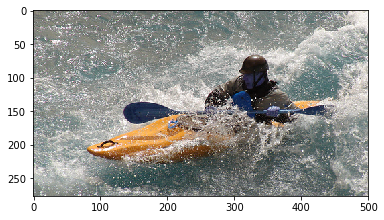

In [79]:
import cv2
img=cv2.imread(fname)
plt.imshow(img)

In [80]:
descr=generate_desc(model_final,tokenizer,photo,max_len)
print(descr)

startseq man in wetsuit is surfing endseq


In [81]:
print(actual[7])

[['startseq', 'boy', 'in', 'blue', 'shorts', 'slides', 'down', 'slide', 'into', 'pool', 'endseq'], ['startseq', 'boy', 'in', 'blue', 'swimming', 'trunks', 'slides', 'down', 'yellow', 'slide', 'into', 'wading', 'pool', 'with', 'inflatable', 'toys', 'floating', 'in', 'the', 'water', 'endseq'], ['startseq', 'boy', 'rides', 'down', 'slide', 'into', 'small', 'backyard', 'pool', 'endseq'], ['startseq', 'boy', 'sliding', 'down', 'slide', 'into', 'pool', 'with', 'colorful', 'tubes', 'endseq'], ['startseq', 'child', 'is', 'falling', 'off', 'slide', 'onto', 'colored', 'balloons', 'floating', 'on', 'pool', 'of', 'water', 'endseq']]


In [82]:
print(predicted[7])

['startseq', 'young', 'boy', 'in', 'pink', 'shirt', 'is', 'playing', 'in', 'the', 'grass', 'endseq']


In [101]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.inception_resnet_v2 import InceptionResNetV2,preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
#from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import load_model

# extract features from each photo in the directory
def extract_features(filename):
	# load the model
	model = InceptionResNetV2()
	# re-structure the model
	model.layers.pop()
	model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
	# load the photo
	image = load_img(filename, target_size=(299, 299))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

t1=time.time()
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
#download = drive.CreateFile({'id': '10mMJv6xoKqIMPv4Q1ps8tgbha9_IDWnb'})
#download.GetContentFile('model_4_3.h5')

model_final_2 = load_model('model-ep003-loss3.433-val_loss3.683.h5')
# load and prepare the photograph
fname='Flickr8k/Flicker8k_Dataset/145721498_a27d2db576.jpg'

photo = extract_features(fname)
# generate description
description = generate_desc(model_final_2, tokenizer, photo, max_length)
print(description)
t2=time.time()
print(t2-t1)

startseq man in wetsuit is surfing endseq
140.9511501789093


In [0]:
pickle.dump(tokenizer,open('tokenizer.pkl','wb'))
uploaded = drive.CreateFile({'parents':[{'id': uploadId}] , 'title' : 'tokenizer.pkl'})
uploaded.SetContentFile('tokenizer.pkl')
uploaded.Upload()  


In [0]:
max_len

34

In [0]:
!ls

actual2.pkl	      features.pkl			      predicted2.pkl
actual.pkl	      Flickr8k				      predicted.pkl
adc.json	      Flickr8k.zip			      sample_data
counters.pkl	      model-ep003-loss3.360-val_loss3.631     vocabulary.pkl
descriptions.txt      model-ep003-loss3.360-val_loss3.631.h5
embeddings_index.pkl  model.png


In [0]:
tokenizer

# rough


In [0]:
for item in upl:
  uploadId = '1Hw09omY9-FIa_Z4o0PswO-Xx3Gb6DHU3'
  uploaded = drive.CreateFile({'parents':[{'id': uploadId}] , 'title' : item})
  uploaded.SetContentFile(item)
  uploaded.Upload()  

In [0]:
uploadId = '1Hw09omY9-FIa_Z4o0PswO-Xx3Gb6DHU3'
uploaded = drive.CreateFile({'parents':[{'id': uploadId}] , 'title' : 'descriptions.txt'})
uploaded.SetContentFile('descriptions.txt')
uploaded.Upload()

In [0]:
!ls

sample_data


In [0]:
from keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print('word_index is',len(t.word_index),t.word_index)
print(t.word_docs)
# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')
print(encoded_docs)
pl=t.texts_to_sequences(['nice work'])
print(pl,len(pl),pl[0],len(pl[0]))

OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
word_index is 8 {'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
defaultdict(<class 'int'>, {'done': 1, 'well': 1, 'work': 2, 'good': 1, 'great': 1, 'effort': 1, 'nice': 1, 'excellent': 1})
[[0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[7, 1]] 1 [7, 1] 2


In [0]:
pt=pad_sequences([pl],maxlen=5)
print(pt,pt.shape)
print(pt[0],pt[0].shape)

[[[0 0]
  [0 0]
  [0 0]
  [0 0]
  [7 1]]] (1, 5, 2)
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [7 1]] (5, 2)


In [0]:
!ls

adc.json  descriptions.txt  features.pkl  Flickr8k  Flickr8k.zip  sample_data


In [0]:
!ls

adc.json  descriptions.txt  features.pkl  Flickr8k  Flickr8k.zip  sample_data


In [0]:
2+2

4

In [0]:
del dict

In [0]:
dict()

{}

In [0]:
dict1 = {"a": "123", "b": "456", "c": "789"}
string = "abc"
print(string.maketrans(dict1))
tt=string.maketrans(dict1)
string.translate(tt)

{97: '123', 98: '456', 99: '789'}


'123456789'

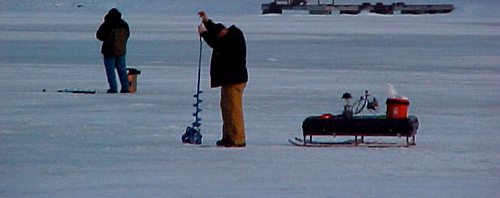

In [0]:
iterlist=os.listdir('Flickr8k/Flicker8k_Dataset/')
load_img('Flickr8k/Flicker8k_Dataset/'+iterlist[0])

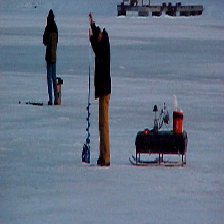

In [0]:
img=load_img('Flickr8k/Flicker8k_Dataset/'+iterlist[0],target_size=(224,224))
img

In [0]:
img=img_to_array(img)
print(img.shape)
print(img)

(224, 224, 3)
[[[102. 119. 135.]
  [103. 120. 138.]
  [ 98. 115. 135.]
  ...
  [ 86. 105. 135.]
  [ 89. 108. 138.]
  [ 86. 105. 135.]]

 [[102. 119. 137.]
  [106. 123. 141.]
  [101. 118. 138.]
  ...
  [ 88. 105. 135.]
  [ 88. 105. 135.]
  [ 87. 104. 134.]]

 [[ 98. 115. 135.]
  [100. 117. 137.]
  [102. 118. 141.]
  ...
  [ 93. 108. 139.]
  [ 92. 105. 137.]
  [ 93. 106. 138.]]

 ...

 [[ 98. 114. 130.]
  [101. 114. 133.]
  [ 95. 110. 131.]
  ...
  [118. 125. 153.]
  [118. 123. 152.]
  [118. 123. 152.]]

 [[ 99. 117. 137.]
  [101. 113. 135.]
  [102. 116. 142.]
  ...
  [118. 125. 151.]
  [118. 125. 151.]
  [118. 125. 151.]]

 [[102. 118. 141.]
  [104. 114. 141.]
  [110. 121. 149.]
  ...
  [117. 125. 148.]
  [117. 125. 148.]
  [116. 124. 147.]]]


In [0]:
img=preprocess_input(img)
img

array([[[ 31.060997  ,   2.2210007 , -21.68      ],
        [ 34.060997  ,   3.2210007 , -20.68      ],
        [ 31.060997  ,  -1.7789993 , -25.68      ],
        ...,
        [ 31.060997  , -11.778999  , -37.68      ],
        [ 34.060997  ,  -8.778999  , -34.68      ],
        [ 31.060997  , -11.778999  , -37.68      ]],

       [[ 33.060997  ,   2.2210007 , -21.68      ],
        [ 37.060997  ,   6.2210007 , -17.68      ],
        [ 34.060997  ,   1.2210007 , -22.68      ],
        ...,
        [ 31.060997  , -11.778999  , -35.68      ],
        [ 31.060997  , -11.778999  , -35.68      ],
        [ 30.060997  , -12.778999  , -36.68      ]],

       [[ 31.060997  ,  -1.7789993 , -25.68      ],
        [ 33.060997  ,   0.22100067, -23.68      ],
        [ 37.060997  ,   1.2210007 , -21.68      ],
        ...,
        [ 35.060997  ,  -8.778999  , -30.68      ],
        [ 33.060997  , -11.778999  , -31.68      ],
        [ 34.060997  , -10.778999  , -30.68      ]],

       ...,

      

In [0]:
len(os.listdir('Flickr8k/Flicker8k_Dataset/'))

8091

In [0]:
model=VGG16()
print(model.summary())
model.inputs

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 14s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__

[<tf.Tensor 'input_1:0' shape=(?, 224, 224, 3) dtype=float32>]

In [0]:
ffrom google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

In [0]:
#https://drive.google.com/drive/folders/1Hw09omY9-FIa_Z4o0PswO-Xx3Gb6DHU3
uploadId = '1Hw09omY9-FIa_Z4o0PswO-Xx3Gb6DHU3'
uploaded = drive.CreateFile({'parents':[{'id': uploadId}] , 'title' : 'features'})
uploaded.SetContentFile('features.pkl')
uploaded.Upload()

In [0]:
uploadId = '1LDCrJpp7e9OZh3jRpoJh47v22huRssQ9'
uploaded = drive.CreateFile({'parents':[{'id': uploadId}] , 'title' : 'LSTMH52SIG_TRUE'})
uploaded.SetContentFile('LSTMmodelSIG_TRUE.h5')
uploaded.Upload()
                #dataName=chkName+".data-00000-of-00001"
                #check="data/"+dataName
                

In [0]:
# serialize model to JSON
model_json = model.to_json()
with open("LSTMmodelSIG_TRUE.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("LSTMmodelSIG_TRUE.h5")
print("Saved model to disk")
 
  
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))